In [31]:
import pandas as pd
df = pd.read_csv('NetflixViewingHistory.csv')
df.head()


,title,Season,episode,date,year,Day_of_the_week
0,Cleaning Up,Season 1,Episode 1,Wednesday 3 April 2024,2024,4
1,Testament,Season 1,,Wednesday 3 April 2024,2024,4
2,Testament,Season 1,,Tuesday 2 April 2024,2024,3
3,Testament,Season 1,,Tuesday 2 April 2024,2024,3
4,The Chosen,Season 1,,Monday 1 April 2024,2024,2


In [63]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Read the CSV file into a DataFrame
df = pd.read_csv('NetflixViewingHistory.csv')

# Find the mode (most frequent day) in the "Day of the week" column
mode_day = df['Day_of_the_week'].mode()[0]

# Define a dictionary to map numerical day values to corresponding day names
day_names = { 1: 'Sunday', 2: 'Monday',3: 'Tuesday',4: 'Wednesday',5: 'Thursday',6: 'Friday',7: 'Saturday'}


mode_year = df['year'].mode()
print (mode_year)

most_show = df['title'].mode()
print (most_show)


# Print the result
#print('Most Netflix is watched on', day_names[mode_day])

count_gg = df['title'].str.count('Gilmore Girls').sum()
print (count_gg)

count_bb = df['title'].str.count('The Big Bang Theory').sum()
print (count_bb)

count_da = df['title'].str.count('Masterpiece Classic').sum()
print (count_da)


0    2023
Name: year, dtype: int64
0    The Big Bang Theory
Name: title, dtype: object
157.0
279.0
52.0


In [110]:
df['title'] = df['title'].str.replace('Masterpiece Classic', 'Downtown Abbey')
count_da = df['title'].str.count('Downtown Abbey').sum()
print (" Total hours of Downton Abbey watched ", count_da)


 Total hours of Downton Abbey watched  52.0


year
2018    253
2019    399
2020    475
2021    508
2022    814
2023    820
2024    111
Name: title, dtype: int64


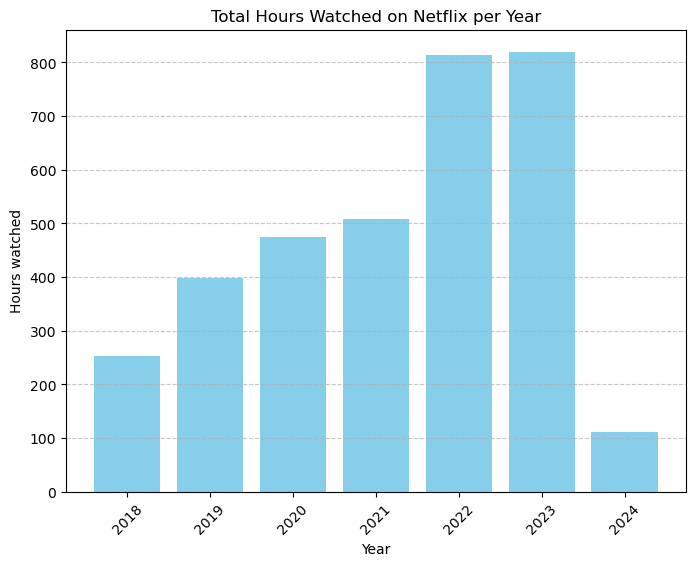

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NetflixViewingHistory.csv')

# Grouping by year and counting the number of titles watched in each year
total_hours_per_year = df.groupby('year')['title'].count()

print(total_hours_per_year)

plt.figure(figsize=(8, 6))
plt.bar(total_hours_per_year.index, total_hours_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Hours watched')
plt.title('Total Hours Watched on Netflix per Year')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

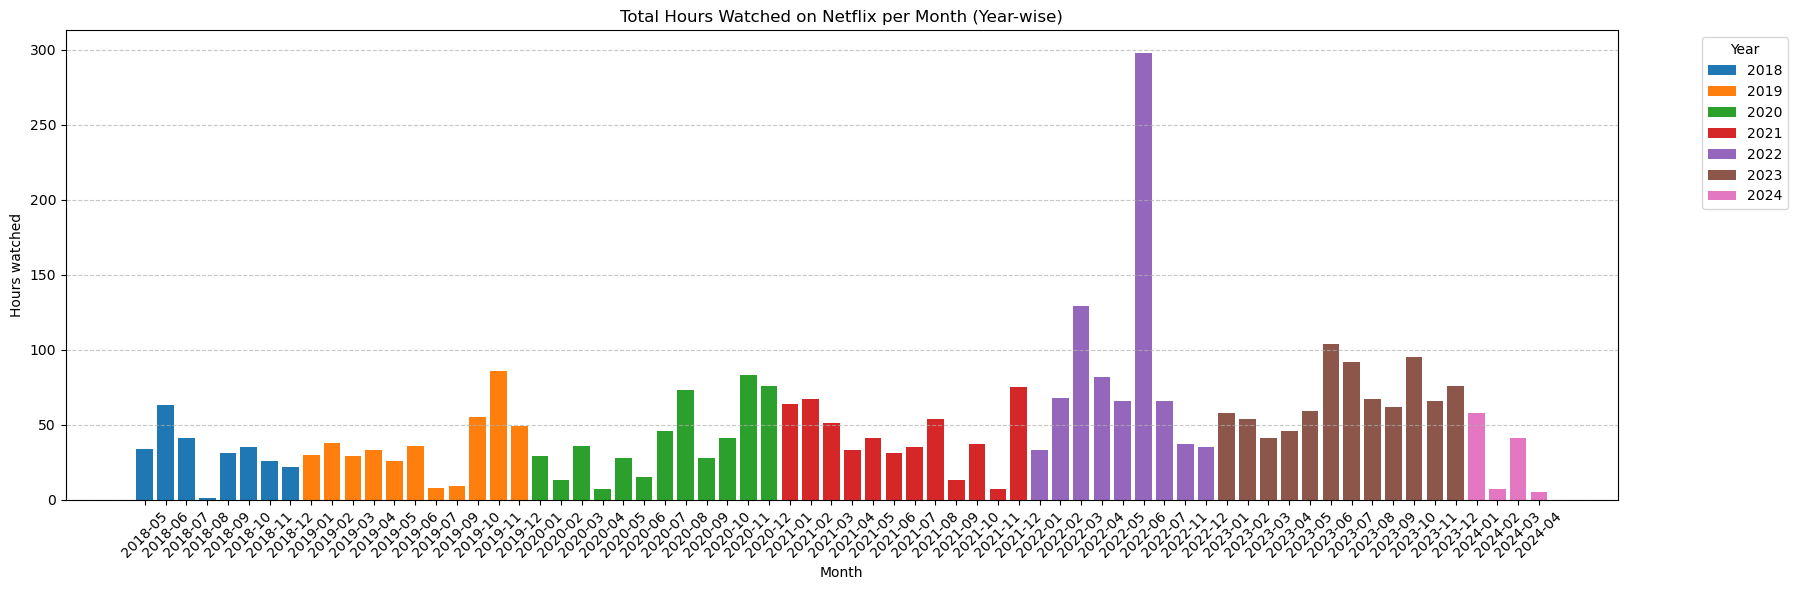

In [94]:
df = pd.read_csv('NetflixViewingHistory.csv')

# Extracting year and month from the 'date' column
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')

# Grouping by year and month and counting the number of titles watched in each month
total_hours_per_month = df.groupby(['year', 'year_month'])['title'].count()

# Plotting each month within each year separately
fig, ax = plt.subplots(figsize=(18, 6))

for year in total_hours_per_month.index.levels[0]:
    months = total_hours_per_month[year].index.astype(str)
    values = total_hours_per_month[year].values
    ax.bar(months, values, label=str(year))

ax.set_xlabel('Month')
ax.set_ylabel('Hours watched')
ax.set_title('Total Hours Watched on Netflix per Month (Year-wise)')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [102]:
import pandas as pd

df = pd.read_csv('NetflixViewingHistory.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Initialize an empty dictionary to store the total hours watched for each month
hours_watched_per_month = {}

# Iterate over each month in 2023
for month in range(1, 13):
    # Filter the DataFrame to include only rows where the date falls within the current month of 2023
    month_data = df[(df['date'].dt.year == 2022) & (df['date'].dt.month == month)]
    
    # Sum the hours watched in the current month
    hours_watched_per_month[month] = month_data.shape[0]  # Assuming each title is 1 hour

# Print the total hours watched for each month in 2023
for month, hours_watched in hours_watched_per_month.items():
    print(f"Total hours watched in 2022 {pd.Timestamp(year=2022, month=month, day=1).strftime('%B')}: {hours_watched}")


Total hours watched in 2022 January: 33
Total hours watched in 2022 February: 68
Total hours watched in 2022 March: 129
Total hours watched in 2022 April: 82
Total hours watched in 2022 May: 66
Total hours watched in 2022 June: 298
Total hours watched in 2022 July: 66
Total hours watched in 2022 August: 0
Total hours watched in 2022 September: 0
Total hours watched in 2022 October: 0
Total hours watched in 2022 November: 37
Total hours watched in 2022 December: 35


In [103]:
import pandas as pd

df = pd.read_csv('NetflixViewingHistory.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Initialize an empty dictionary to store the total hours watched for each month
hours_watched_per_month = {}

# Iterate over each month in 2023
for month in range(1, 13):
    # Filter the DataFrame to include only rows where the date falls within the current month of 2023
    month_data = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == month)]
    
    # Sum the hours watched in the current month
    hours_watched_per_month[month] = month_data.shape[0]  # Assuming each title is 1 hour

# Print the total hours watched for each month in 2023
for month, hours_watched in hours_watched_per_month.items():
    print(f"Total hours watched in 2021 {pd.Timestamp(year=2021, month=month, day=1).strftime('%B')}: {hours_watched}")


Total hours watched in 2021 January: 64
Total hours watched in 2021 February: 67
Total hours watched in 2021 March: 51
Total hours watched in 2021 April: 33
Total hours watched in 2021 May: 41
Total hours watched in 2021 June: 31
Total hours watched in 2021 July: 35
Total hours watched in 2021 August: 54
Total hours watched in 2021 September: 13
Total hours watched in 2021 October: 37
Total hours watched in 2021 November: 7
Total hours watched in 2021 December: 75


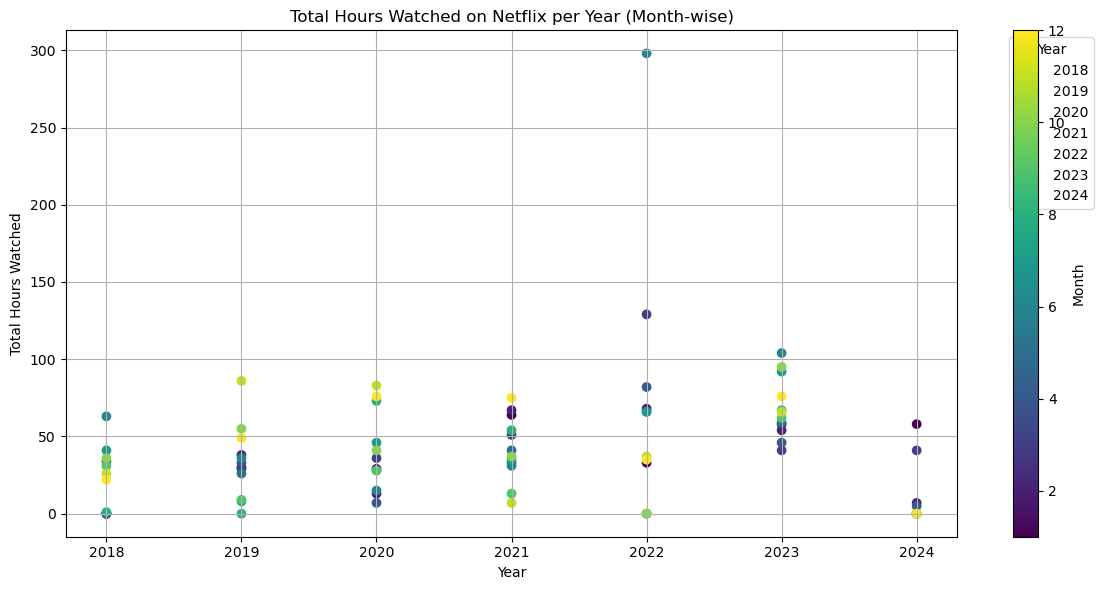

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('NetflixViewingHistory.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Initialize an empty list to store the total hours watched for each month
hours_watched_per_month = []

# Iterate over each year from 2018 to 2024
for year in range(2018, 2025):
    # Iterate over each month from January to December
    for month in range(1, 13):
        # Filter the DataFrame to include only rows where the date falls within the current month and year
        month_data = df[(df['date'].dt.year == year) & (df['date'].dt.month == month)]
        
        # Sum the hours watched in the current month and year
        total_hours = month_data.shape[0]  # Assuming each title is 1 hour
        hours_watched_per_month.append((year, month, total_hours))

# Convert the list to a DataFrame for easier plotting
hours_df = pd.DataFrame(hours_watched_per_month, columns=['Year', 'Month', 'Total Hours Watched'])

# Plotting scatter plot
plt.figure(figsize=(12, 6))

# Iterate over each year and plot the total hours watched for each month with a different color
for year in range(2018, 2025):
    year_data = hours_df[hours_df['Year'] == year]
    plt.scatter(year_data['Year'], year_data['Total Hours Watched'], c=year_data['Month'], cmap='viridis', label=str(year))

plt.xlabel('Year')
plt.ylabel('Total Hours Watched')
plt.title('Total Hours Watched on Netflix per Year (Month-wise)')
plt.xticks(range(2018, 2025))
plt.colorbar(label='Month')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


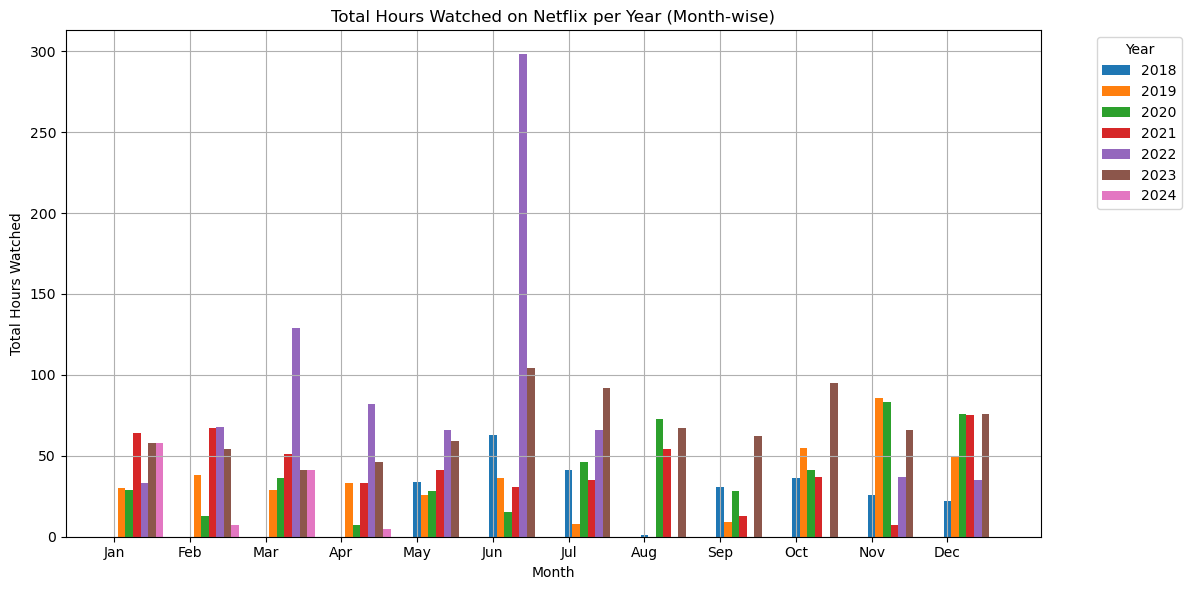

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('NetflixViewingHistory.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Initialize an empty list to store the total hours watched for each month
hours_watched_per_month = []

# Iterate over each year from 2018 to 2024
for year in range(2018, 2025):
    # Initialize a list to store the total hours watched for each month in the current year
    total_hours_per_year = []
    
    # Iterate over each month from January to December
    for month in range(1, 13):
        # Filter the DataFrame to include only rows where the date falls within the current month and year
        month_data = df[(df['date'].dt.year == year) & (df['date'].dt.month == month)]
        
        # Sum the hours watched in the current month and year
        total_hours = month_data.shape[0]  # Assuming each title is 1 hour
        total_hours_per_year.append(total_hours)
    
    # Append the total hours watched for each month in the current year to the list
    hours_watched_per_month.append(total_hours_per_year)

# Convert the list to a numpy array for easier plotting
hours_array = np.array(hours_watched_per_month)

# Plotting bar graph
plt.figure(figsize=(12, 6))

# Iterate over each year and plot the total hours watched for each month
for i, year in enumerate(range(2018, 2025)):
    plt.bar(np.arange(1, 13) + i * 0.1, hours_array[i], width=0.1, label=str(year))

plt.xlabel('Month')
plt.ylabel('Total Hours Watched')
plt.title('Total Hours Watched on Netflix per Year (Month-wise)')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


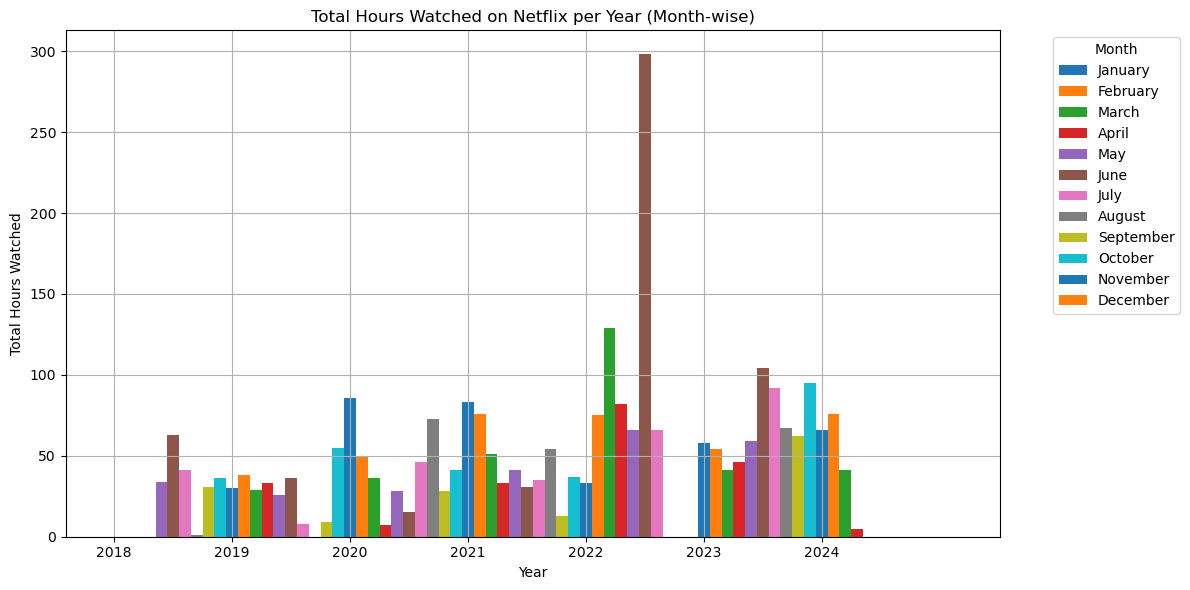

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('NetflixViewingHistory.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Initialize an empty list to store the total hours watched for each month
hours_watched_per_month = []

# Iterate over each year from 2018 to 2024
for year in range(2018, 2025):
    # Initialize a list to store the total hours watched for each month in the current year
    total_hours_per_year = []
    
    # Iterate over each month from January to December
    for month in range(1, 13):
        # Filter the DataFrame to include only rows where the date falls within the current month and year
        month_data = df[(df['date'].dt.year == year) & (df['date'].dt.month == month)]
        
        # Sum the hours watched in the current month and year
        total_hours = month_data.shape[0]  # Assuming each title is 1 hour
        total_hours_per_year.append(total_hours)
    
    # Append the total hours watched for each month in the current year to the list
    hours_watched_per_month.append(total_hours_per_year)

# Convert the list to a numpy array for easier plotting
hours_array = np.array(hours_watched_per_month)

# Plotting bar graph
plt.figure(figsize=(12, 6))

# Iterate over each month and plot the total hours watched for each year
for i in range(12):
    plt.bar(np.arange(2018, 2025) + i * 0.1, hours_array[:, i], width=0.1, label=pd.Timestamp(month=i + 1, day=1, year=2023).strftime('%B'))

plt.xlabel('Year')
plt.ylabel('Total Hours Watched')
plt.title('Total Hours Watched on Netflix per Year (Month-wise)')
plt.xticks(np.arange(2018, 2025), [str(year) for year in range(2018, 2025)])
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


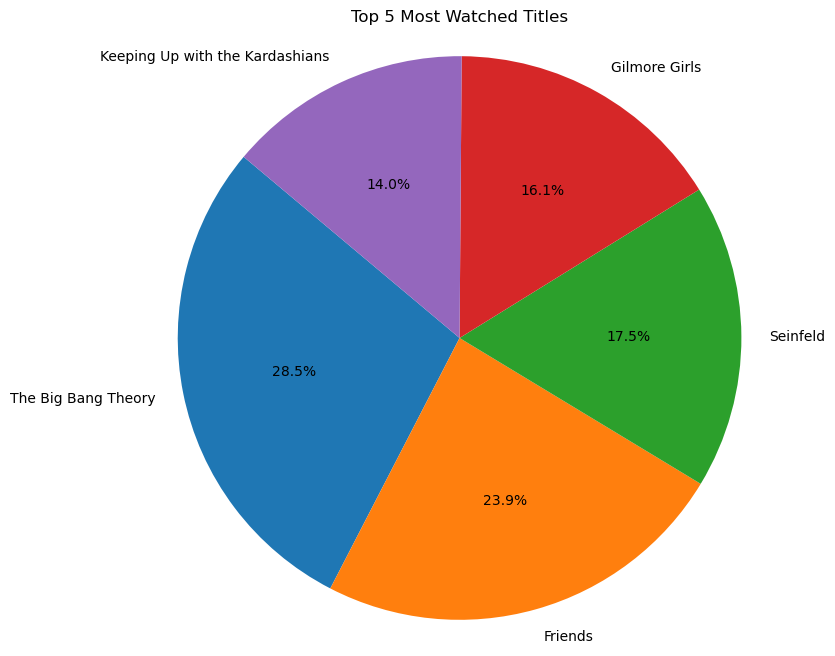

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NetflixViewingHistory.csv')

# Group by title and sum the hours watched for each title
title_hours = df.groupby('title')['title'].count().sort_values(ascending=False)

# Select the top 5 most watched titles
top_5_titles = title_hours.head(5)

# Plotting pie chart for the top 5 most watched titles
plt.figure(figsize=(8, 8))
plt.pie(top_5_titles, labels=top_5_titles.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Watched Titles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [5]:


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Sample data
descriptions = {
    "Friends": "Friends is a 90's Comedy TV show, based in Manhattan, about 6 friends who go through just about every life experience imaginable together; love, marriage, divorce, children, heartbreaks, fights, new jobs and job losses and all sorts of drama.",
    "Gilmore Girls": "Gilmore Girls (styled onscreen as Gilmore girls) is an American comedy-drama television series created by Amy Sherman-Palladino and starring Lauren Graham (Lorelai Gilmore) and Alexis Bledel (Rory Gilmore). The show debuted on October 5, 2000, on The WB and became a flagship series for the network.",
    "The Big Bang Theory": "The Big Bang Theory is a popular American television sitcom that aired from 2007 to 2019. The show revolves around a group of socially awkward but brilliant scientists and their interactions with each other and with the world around them. The humor often stems from their nerdy interests, pop culture references, and their struggles with social and romantic relationships. The show received both critical acclaim and a large fan following during its run.",
    "Seinfeld": "Seinfeld, a sitcom created by Jerry Seinfeld and Larry David which ran on NBC from 1989 to 1998, is a show about nothing. No hugging, no learning. Okay, seriously. One of the most popular shows yet/ever made, Seinfeld mostly centered around a quartet of self-absorbed Unsympathetic Comedy Protagonists obsessing over the minutiae of modern life. Initially starting life as a one-off TV special called The Seinfeld Chronicles in 1989 before turning into a full series the following year, it lasted for nine seasons from 1989 to 1998, only ending when Jerry Seinfeld himself refused to go on, even after being offered 5 million dollars an episode for a tenth season. Seinfeld was named the greatest television program of all time by TV Guide in 2002.",
    "Keeping Up with the Kardashians": "Keeping Up with the Kardashians (often abbreviated KUWTK) is an American reality television series which focused on the personal and professional lives of the Kardashian–Jenner blended family."
}

# Function to derive keywords from text
def derive_keywords(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Filter out stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    # Count the frequency of each word
    word_freq = Counter(filtered_tokens)
    
    # Sort the words by frequency
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    
    # Return the top 5 most frequent words
    return [word for word, freq in sorted_words[:5]]

# Derive keywords for each description
keywords = {title: derive_keywords(description) for title, description in descriptions.items()}

# Print the keywords for each show
for title, kw in keywords.items():
    print(f"{title}: {kw}")
    


Friends: ['friends', '90', 'comedy', 'tv', 'show']
Gilmore Girls: ['gilmore', 'girls', 'series', 'styled', 'onscreen']
The Big Bang Theory: ['show', 'around', 'big', 'bang', 'theory']
Seinfeld: ['seinfeld', '1989', 'jerry', '1998', 'life']
Keeping Up with the Kardashians: ['keeping', 'kardashians', 'often', 'abbreviated', 'kuwtk']


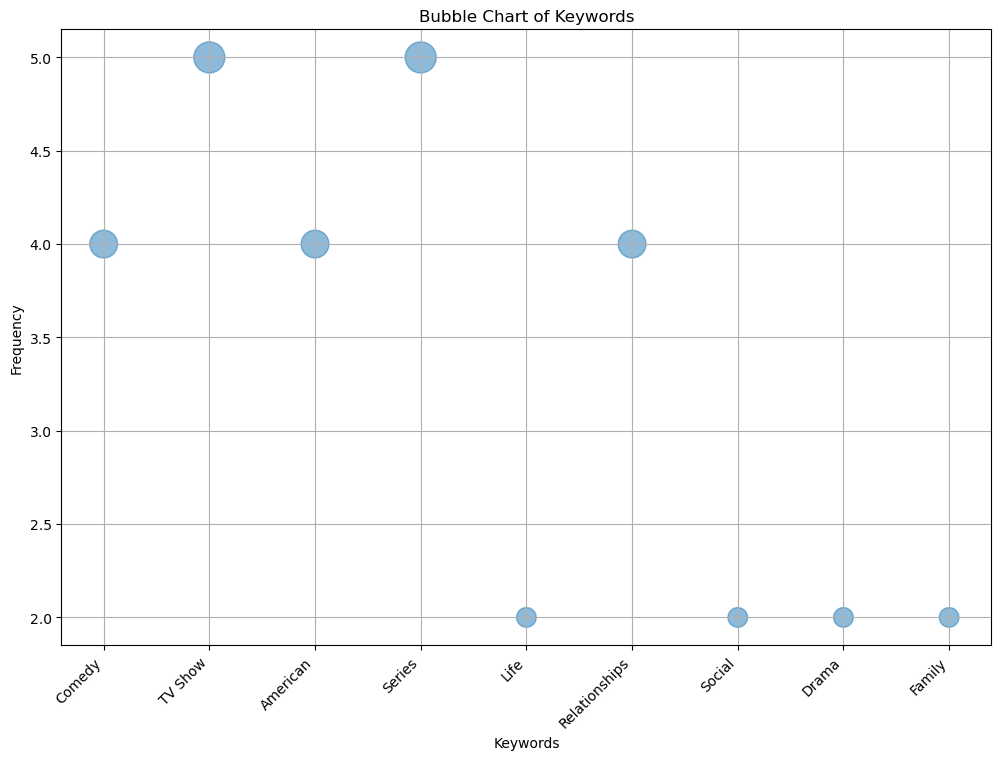

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Keywords and their frequencies
keywords = {
    "Comedy": 4,
    "TV Show": 5,
    "American": 4,
    "Series": 5,
    "Life": 2,
    "Relationships": 4,
    "Social": 2,
    "Drama": 2,
    
    "Family": 2
}

# Extract keywords and frequencies
labels = list(keywords.keys())
sizes = list(keywords.values())

# Convert sizes to numpy array with float dtype
sizes = np.array(sizes, dtype=float)

# Plot bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(labels, sizes, s=sizes*100, alpha=0.5)
plt.title('Bubble Chart of Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


In [19]:
import pandas as pd
df = pd.read_csv('NetflixViewingHistory.csv')


total_episodes_BB = df['title'].str.count('The Big Bang Theory').sum()

total_show_BB = 139.5  

# Total number of reruns
total_reruns = total_episodes_BB / total_show_BB

total_reruns_formatted = "{:.2f}".format(total_reruns)
print(total_reruns_formatted)

2.00


In [26]:
import pandas as pd

# Read the Netflix viewing history data
df = pd.read_csv('NetflixViewingHistory.csv')

# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Drop rows with missing values
df = df.dropna()

# Filter the DataFrame to include only rows where the title contains 'The Big Bang Theory'
bb_df = df[df['title'].str.contains('The Big Bang Theory')]

# Find the earliest and latest date you watched "The Big Bang Theory"
earliest_date = bb_df['date'].min()
latest_date = bb_df['date'].max()

print("You first watched 'The Big Bang Theory' on:", earliest_date)
print("You last watched 'The Big Bang Theory' on:", latest_date)


You first watched 'The Big Bang Theory' on: 2019-12-28 00:00:00
You last watched 'The Big Bang Theory' on: 2024-03-03 00:00:00


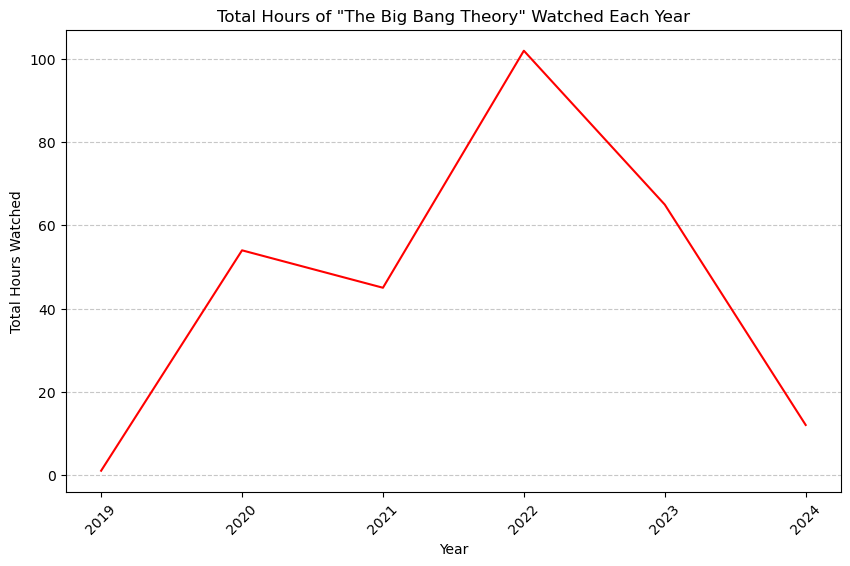

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Netflix viewing history data
df = pd.read_csv('NetflixViewingHistory.csv')

# Drop rows with missing values in the 'title' column
df = df.dropna(subset=['title'])

# Filter the DataFrame to include only rows where the title contains 'The Big Bang Theory'
bb_df = df[df['title'].str.contains('The Big Bang Theory')]

# Group by 'year' and calculate the total number of episodes watched in each year
episodes_per_year = bb_df.groupby('year').size()

# Assuming each episode is one hour, calculate the total hours watched in each year
hours_per_year = episodes_per_year

# Plot the total hours watched in each year on a bar graph
plt.figure(figsize=(10, 6))
hours_per_year.plot(kind='line', color='gree')
plt.title('Total Hours of "The Big Bang Theory" Watched Each Year')
plt.xlabel('Year')
plt.ylabel('Total Hours Watched')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
